Time series:Random Walk (CH 3)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt

np.random.seed(42) 

In [2]:
steps = np.random.standard_normal (1000) #1000 random steps with mean 0 and variance 1
steps[0]=0
random_walk = np.cumsum(steps) #cumulative sum of erros for each timestep

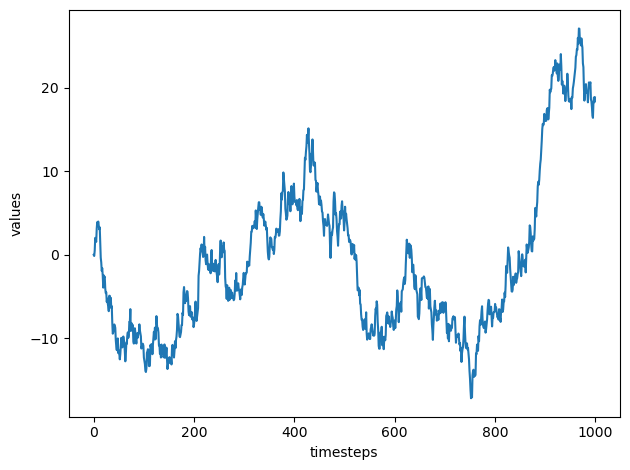

In [5]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("timesteps")
ax.set_ylabel("values")
plt.tight_layout()

Testing for stationarity using the augmented Dickey-Fuller test 

In [6]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(random_walk)

print(f'ADF Statitstic: {adf_result[0]}') #the ADF statistic is the firstvalue in the results list 
print(f'p-value: {adf_result[1]}') #the P-value is the second value in the results list

ADF Statitstic: -0.9659524876918751
p-value: 0.7654789696692581


The p value is greater than 0.05, the ADF statistic is not a large negative number thus we cannot reject the null hypothesis that states our time series is not stationary. We can support our conclusion by plotting the ACF function:

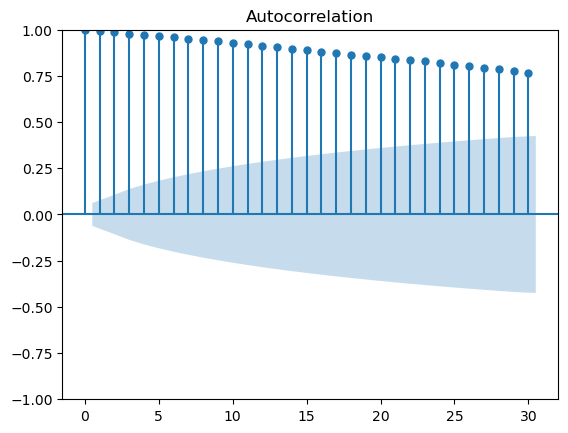

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=30)
plt.show()

notice how the autocorrelation coefficients slowly decrease as the
lag increases, which is a clear indicator that our random walk is not a stationary process.
The shaded area represents a confidence interval. If a point is within the shaded area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is significant.

Apply transformation to make the random walk stationary and retrieve useful info from the ACF plot 

Use first-order differencing and note that we will lose the first data point

In [8]:
diff_random_walk = np.diff(random_walk, n=1)

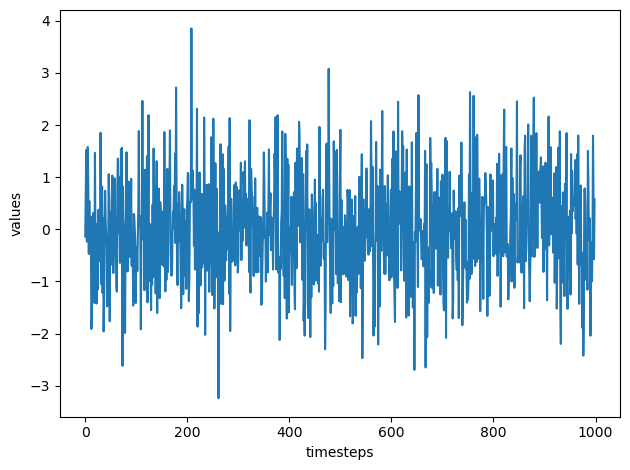

In [9]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_xlabel("timesteps")
ax.set_ylabel("values")
plt.tight_layout()

#variance looks more stable, the trend has also been removed

In [12]:
#test for stationarity once more 

adf_result = adfuller(diff_random_walk)



In [13]:
print(f'ADF Statstic: {adf_result[0]}')

print(f'p-value: {adf_result[1]}')

ADF Statstic: -31.789310857560615
p-value: 0.0


From the resuts above, the ADF statistic is a large negative and the p-value is 0. Thus this process has no unit root and is thus stationary. Reject the null hypothesis.

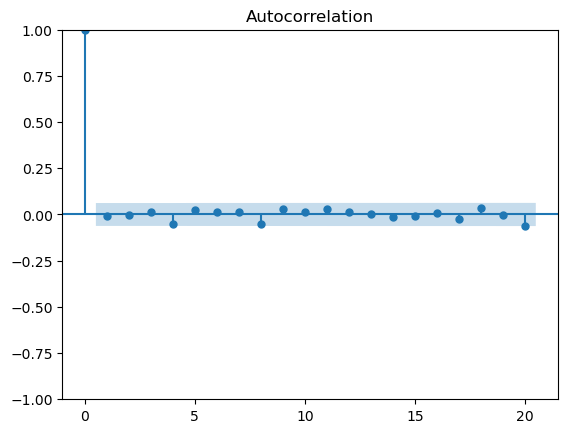

In [15]:
plot_acf(diff_random_walk, lags=20)

plt.show()

notice that there are no significant autocorrelation coefficients after lag 0. This means that the stationary process is completely random and can therefore be described as white noise. Each value is simply a random step away from the previous one, with no relation between them

Is GOOGL dataset a random walk?

In [17]:
df = pd.read_csv(r"C:\Users\user\Downloads\GOOGL.csv")

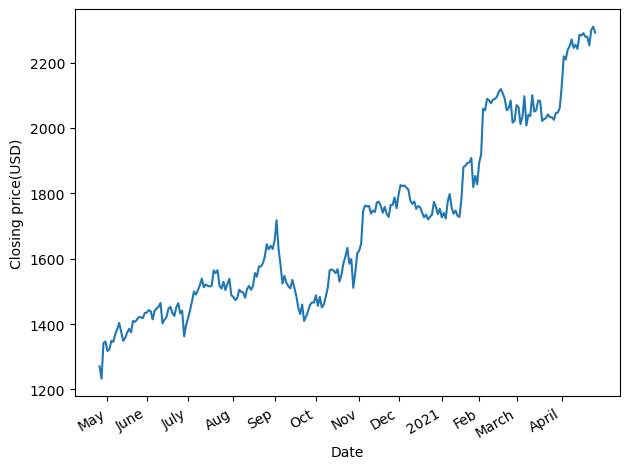

In [18]:
fig, ax = plt.subplots()

ax.plot(df["Date"], df["Close"])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price(USD)')

plt.xticks([4,24,45,68,89,110,132,152,174,193,212,235],['May','June','July','Aug','Sep','Oct','Nov','Dec', 2021,'Feb','March','April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [19]:
#performing and ADF test: 

Googl_adf_result = adfuller(df["Close"])

In [20]:
print(f'ADF statistic: {Googl_adf_result[0]}')

print(f'p-value: {Googl_adf_result[1]}')

ADF statistic: 0.1602504866477145
p-value: 0.9699419435913058


P-value greater than .05 and ADF statistic of 0.16 confirms our data is not stationary. 

We can difference our data to make it stationary as shown below:

In [21]:
diff_close = np.diff(df['Close'], n=1)

In [22]:
#run the adf test on the differenced data 

diff_result = adfuller(diff_close)

print(f'ADF Statistic: {diff_result[0]}')

print(f'p-value: {diff_result[1]}')

ADF Statistic: -5.303439704295221
p-value: 5.386530961454919e-06


The negative ADF obtained and a p-value <0.05 means our series is stationary now 

Plot the Autocorrelation function(ACF) 


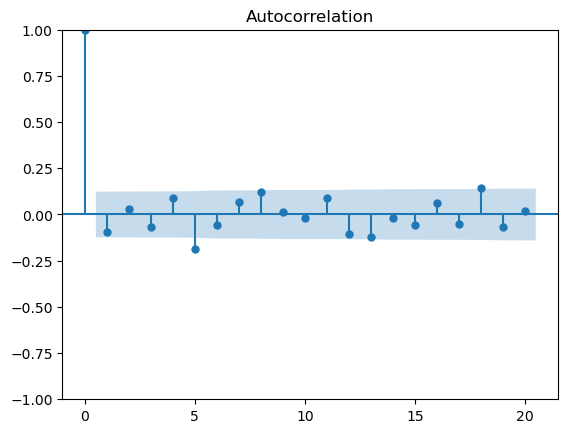

In [24]:
plot_acf(diff_close, lags=20)

plt.show()

> No significant coefficients observed

> at lags 5 and 18, the coefficients are significant but they happened by chance and can be ignored bc there are no consecutive coefficients btn lags 0 and 5, or 0 and 18 



Forecasting a Random Walk 

In [26]:
#forecasting on a long horizon

import pandas as pd

df = pd.DataFrame({'value': random_walk})

In [27]:
train = df[:800]

test = df[800:]

Since we are dealing with random walk, we will use the historical mean, the last known value and the drift method. These are naive forecasting methods


In [28]:
mean = np.mean(train.value)  #calculate mean of the train set

In [29]:

test.loc[:, 'pred_mean'] = mean  #predict historical mean for the next 200 steps

test.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17992\338814452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = mean  #predct historical mean for the next 200 steps


,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [31]:
last_value = train.iloc[-1].value 

test.loc[:, 'pred_last'] = last_value

test.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17992\1164918775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last_value


,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


Drift Method : calculate the slope by taking the difference in y-axis and that in x-axis and divide them to obtain the drift 

In [32]:
deltaX = 800-1

deltaY = last_value - 0

drift = deltaY/deltaX

print(drift)

-0.008529346056640632


In [34]:
#create an array with the range of timeteps starting at 800, ending at 1000, with a step of 1

x_vals = np.arange(801, 1001, 1)

#multiply each timestep by the drift to get the forecast value at each timestep 

pred_drift = drift * x_vals 

#assign forecast values to the pred colmn

test.loc[:, 'pred_drift'] = pred_drift

test.head()

C:\Users\user\AppData\Local\Temp\ipykernel_17992\121902267.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_drift'] = pred_drift


,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


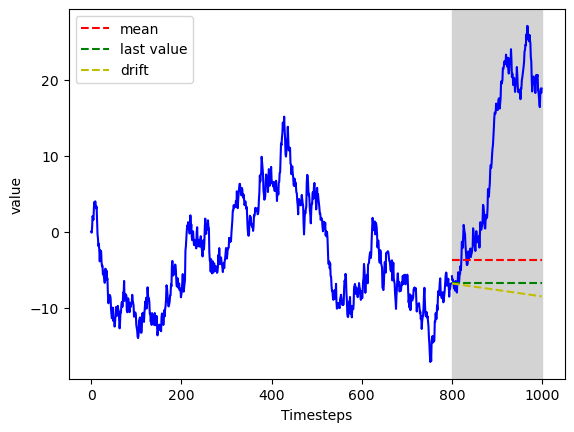

In [36]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r--', label='mean')
ax.plot(test['pred_last'], 'g--', label='last value')
ax.plot(test['pred_drift'], 'y--', label='drift')

ax.axvspan(800, 1000, color='lightgrey')
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('value')

plt.show()

Our forecasts fail to predict the sudden increase observed in the test set, which makes sense because the future change in a random walk is random and unpredictable. 

MSE 

In [37]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test ['pred_mean'])

mse_last = mean_squared_error(test['value'], test ['pred_last'])

mse_drift = mean_squared_error(test['value'], test ['pred_drift'])

print(mse_drift, mse_last, mse_mean)

466.2172769077409 425.1726033055617 326.50277395297474


Conclusions:

Forecasting a random walk on a long horizon does not make sense. The randomness portion is magnified in a long horizon where many random numbers are added over the course of many timesteps. 

Forecasting the next timestep 

We predict the last known value and make this forecast only for the next timestamp. Once a new value is recorded, it will be used as a forecast for the following timestep, then repeated into the future 

In [39]:
#use pandas shift method

df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


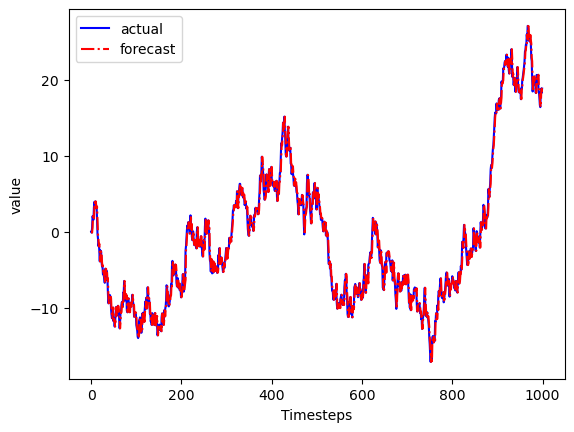

In [40]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('value')

plt.show()

In [41]:
#calculate MSE

mse_one_sep = mean_squared_error(test['value'], df_shift[800:])

print(mse_one_sep)

0.9256876651440581
